### Ein-/Ausblenden von Code im Notebook

Im folgenden Notebook kann der Code von entsprechend gekennzeichneten Zellen jeweils nach Bedarf durch Drücken auf den Button "Code ein-/ausblenden" ein- und ausgeblendet werden.

In [39]:
## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.

from IPython.display import HTML, display

toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))

### Notwendige Python-Bibliotheken

**Allgemein**  
Python bringt sogenannte "built-in"-Funktionen mit, welche nicht über Bibliotheken importiert oder selbst geschrieben werden müssen; hierzu gehören z.B. "len" (Länge einer Sequenz) und "sum" (Summe einer Sequenz).  
Weitere benötigte Funktionen müssen entweder über eine Bibliothek importiert oder sie müssen selbst geschrieben werden.
Für die Berechnung von Wurzeln benötigen wir die Bibliothek "math".
Für die Berechnung der Ergebnisse der eigentlichen Aufgaben (z.B. des Mittelwerts) schreiben wir in den späteren Varianten selbst Funktionen.

In [62]:
import math
import pandas as pd

toggle_code()

# Lektion 2 - Aufgabentext

Der zu bearbeitende Aufgabentext lautet:
> In einer Mathearbeit, bei der maximal 10 Punkte erreicht werden konnten, haben 50
Schüler teilgenommen. Die Beobachtungswerte sind: 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4,
4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9,
10, 10. Der Lehrer möchte das Ergebnis gerne statistisch auswerten. Sie können ihm
bei dieser Aufgabe helfen, indem Sie das Ihnen bisher bekannte Instrumentarium
anwenden. Hinweis: Es konnten nur ganze Punkte verteilt werden.

# == Variante: manuelle Berechnung der Lösung ("Taschenrechner") ==

In der Variante 1 berechnen wir die Ergebnisse, wie man sie z.B. auch in einem Taschenrechner berechnen könnte. Der Rechnungsweg wird explizit und ausführlich angegeben.

### Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i} $$

Für den Mittelwert muss die Summe der Einzelelemente der Rohdaten gebildet und diese dann durch die Anzahl der Elemente geteilt werden.

In [6]:
xquer = (0 + 1 + 1 + 1 + 2 + 2 + 2 + 2 + 3 + 3 + 4 + 4 + 4 + 4 + 4 + 5 + 5 + 5 + 5 + 5 + 5 + 6 + 6 + 6 + 
         6 + 6 + 6 + 6 + 6 + 7 + 7 + 7 + 7 + 7 + 7 + 7 + 7 + 7 + 7 + 8 + 8 + 8 + 8 + 9 + 9 + 9 + 9 + 9 + 10 + 10) / 50

In [7]:
print(xquer)

5.64


### Mittlere absolute Abweichung MAD

$$ MAD = \frac{1}{n} \sum_{i=1}^n{ \mid x_i - \bar{x} \mid } $$

Bei der mittleren absoluten Abweichung wird von jedem Element der Mittelwert abgezogen und dann der Absolutwert genommen. Die Absolutwerte werden aufaddiert und dann durch die Anzahl der Elemente geteilt.

In [8]:
mad = (abs(0 - xquer) + abs(1 - xquer) + abs(1 - xquer) + abs(1 - xquer) + abs(2 - xquer) + abs(2 - xquer) + 
       abs(2 - xquer) + abs(2 - xquer) + abs(3 - xquer) + abs(3 - xquer) + abs(4 - xquer) + abs(4 - xquer) + 
       abs(4 - xquer) + abs(4 - xquer) + abs(4 - xquer) + abs(5 - xquer) + abs(5 - xquer) + abs(5 - xquer) + 
       abs(5 - xquer) + abs(5 - xquer) + abs(5 - xquer) + abs(6 - xquer) + abs(6 - xquer) + abs(6 - xquer) + 
       abs(6 - xquer) + abs(6 - xquer) + abs(6 - xquer) + abs(6 - xquer) + abs(6 - xquer) + abs(7 - xquer) + 
       abs(7 - xquer) + abs(7 - xquer) + abs(7 - xquer) + abs(7 - xquer) + abs(7 - xquer) + abs(7 - xquer) + 
       abs(7 - xquer) + abs(7 - xquer) + abs(7 - xquer) + abs(8 - xquer) + abs(8 - xquer) + abs(8 - xquer) + 
       abs(8 - xquer) + abs(9 - xquer) + abs(9 - xquer) + abs(9 - xquer) + abs(9 - xquer) + abs(9 - xquer) + 
       abs(10 - xquer) + abs(10 - xquer)) / 50

In [9]:
print(mad)

2.0576


### Varianz

$$ s^2 = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x})^2 } $$

Die Varianz wird ähnlich berechnet wie die mittlere absolute Abweichung, allerdings wird nicht der Absolutwert der Differenz zwischen Einzelelement und Mittelwert genommen, sondern die Differenz wird quadriert. Die Summe der quadrierten Abweichungen wird dann wieder durch die Anzahl der Elemente geteilt.

In [10]:
var = ((0 - xquer)**2 + (1 - xquer)**2 + (1 - xquer)**2 + (1 - xquer)**2 + (2 - xquer)**2 + (2 - xquer)**2 + 
       (2 - xquer)**2 + (2 - xquer)**2 + (3 - xquer)**2 + (3 - xquer)**2 + (4 - xquer)**2 + (4 - xquer)**2 + 
       (4 - xquer)**2 + (4 - xquer)**2 + (4 - xquer)**2 + (5 - xquer)**2 + (5 - xquer)**2 + (5 - xquer)**2 + 
       (5 - xquer)**2 + (5 - xquer)**2 + (5 - xquer)**2 + (6 - xquer)**2 + (6 - xquer)**2 + (6 - xquer)**2 + 
       (6 - xquer)**2 + (6 - xquer)**2 + (6 - xquer)**2 + (6 - xquer)**2 + (6 - xquer)**2 + (7 - xquer)**2 + 
       (7 - xquer)**2 + (7 - xquer)**2 + (7 - xquer)**2 + (7 - xquer)**2 + (7 - xquer)**2 + (7 - xquer)**2 + 
       (7 - xquer)**2 + (7 - xquer)**2 + (7 - xquer)**2 + (8 - xquer)**2 + (8 - xquer)**2 + (8 - xquer)**2 + 
       (8 - xquer)**2 + (9 - xquer)**2 + (9 - xquer)**2 + (9 - xquer)**2 + (9 - xquer)**2 + (9 - xquer)**2 + 
       (10 - xquer)**2 + (10 - xquer)**2) / 50

In [11]:
print(var)

6.310400000000005


### Standardabweichung

$$ s = \sqrt{s^2} $$

Bei der Standardabweichung wird die Wurzel aus der Varianz gezogen; hierfür benötigen wir bei der Umsetzung mit Python die oben importierte Bibliothek sqrt.

In [12]:
sd = math.sqrt(var)

In [13]:
print(sd)

2.512050954897214


### Berechnung / Darstellung über eine Tabelle

In [50]:
data = [0, 
        1, 1, 1, 
        2, 2, 2, 2, 
        3, 3, 
        4, 4, 4, 4, 4, 
        5, 5, 5, 5, 5, 5, 
        6, 6, 6, 6, 6, 6, 6, 6, 
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
        8, 8, 8, 8, 
        9, 9, 9, 9, 9,
        10, 10]
df_raw = pd.DataFrame()
df_raw['x'] = data
df_raw['x-xquer'] = df_raw['x'] - df_raw['x'].mean()
df_raw['abs(x-xquer)'] = (df_raw['x'] - df_raw['x'].mean()).abs()
df_raw['(x-xquer)**2'] = (df_raw['x'] - df_raw['x'].mean())**2
df_raw.index = range(1, len(df_raw) + 1)
s = df_raw.sum().round(4)
s.name = 'SUMME'
df_raw = df_raw.append(s)

toggle_code()

In [51]:
df_raw

,x,x-xquer,abs(x-xquer),(x-xquer)**2
1,0.0,-5.64,5.64,31.8096
2,1.0,-4.64,4.64,21.5296
3,1.0,-4.64,4.64,21.5296
4,1.0,-4.64,4.64,21.5296
5,2.0,-3.64,3.64,13.2496
6,2.0,-3.64,3.64,13.2496
7,2.0,-3.64,3.64,13.2496
8,2.0,-3.64,3.64,13.2496
9,3.0,-2.64,2.64,6.9696
10,3.0,-2.64,2.64,6.9696


In [35]:
## Berechnung Mittelwert
282 / 50

5.64

In [32]:
## Berechnung MAD
102.88 / 50

2.0576

In [34]:
## Berechnung Varianz
315.52 / 50

6.3104

In [42]:
## Berechnung Standardabweichung
math.sqrt(315.52 / 50)

2.512050954897213

### Die Häufigkeitsverteilung unserer Rohdaten

Zur Berechnung der Häufigkeitsverteilung wird das Auftreten jedes Elements gezählt. In unseren Rohdaten kommen die Werte 0 bis 10 vor, jeweils mit den folgenden Häufigkeiten:  
0: 1  
1: 3  
2: 4  
3: 2  
4: 5  
5: 6  
6: 8  
7: 10  
8: 4  
9: 5  
10: 2  

Summieren wir die Einzelhäufigkeiten auf, so erhalten wir wieder die Anzahl der Elemente bzw. Beobachtungen in den Rohdaten:

In [44]:
1 + 3 + 4 + 2 + 5+ 6 + 8 + 10 + 4 + 5 + 2

50

### Mittelwert aus einer Häufigkeitsverteilung

$$ \bar{x} = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)x_j } $$

Um den Mittelwert aus einer Häufigkeitsverteilung zu berechnen, multiplizieren wir jede auftretende Ausprägung (in unserem Beispiel: die Werte 0 bis 10) mit der zugehörigen Häufigkeit und bilden über diese Produkte die Summe; diese teilen wir dann durch die Anzahl der Beobachtungen.

In [14]:
xquer = ((0 * 1) + (1 * 3) + (2 * 4) + (3 * 2) + (4 * 5) + (5 * 6) + (6 * 8) + (7 * 10) + (8 * 4) + (9 * 5) + (10 * 2)) / 50

In [15]:
print(xquer)

5.64


### Varianz aus einer Häufigkeitsverteilung

$$ s^2 = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)(x_j - \bar{x})^2 } $$

Für die Berechnung der Varianz aus einer Häufigkeitsverteilung subtrahieren wir von jeder möglichen Merkmalsausprägung den Mittelwert, quadrieren das Ergebnis und multiplizieren es mit der jeweiligen Häufigkeit der Ausprägung. Die Gesamtsumme teilen wir dann wieder durch die Anzahl der Beobachtungen.

In [16]:
var = ((1 * (0 - xquer)**2) + (3 * (1 - xquer)**2) + (4 * (2 - xquer)**2) + (2 * (3 - xquer)**2) + 
       (5 * (4 - xquer)**2) + (6 * (5 - xquer)**2) + (8 * (6 - xquer)**2) + (10 * (7 - xquer)**2) + 
       (4 * (8 - xquer)**2) + (5 * (9 - xquer)**2) + (2 * (10 - xquer)**2)) / 50

In [17]:
print(var)

6.3104000000000005


### Alternative Darstellung: Häufigkeitsverteilung in einer Tabelle

In [58]:
df_h = pd.DataFrame()
df_h['x'] = list(range(0, 11))
df_h['h(x)'] = [1, 3, 4, 2, 5, 6, 8, 10, 4, 5, 2]
df_h['x*h(x)'] = df_h['x'] * df_h['h(x)']
df_h['xquer'] = df_h['x*h(x)'].sum() / df_h['h(x)'].sum()
df_h['(x-xquer)**2'] = (df_h['x'] - df_h['xquer'])**2
df_h['h(x)*(x-xquer)**2'] = df_h['h(x)'] * df_h['(x-xquer)**2']

s = df_h.sum().round(4)
s.name = 'SUMME'
df_h = df_h.append(s)

toggle_code()
df_h

,x,h(x),x*h(x),xquer,(x-xquer)**2,h(x)*(x-xquer)**2
0,0.0,1.0,0.0,5.64,31.8096,31.8096
1,1.0,3.0,3.0,5.64,21.5296,64.5888
2,2.0,4.0,8.0,5.64,13.2496,52.9984
3,3.0,2.0,6.0,5.64,6.9696,13.9392
4,4.0,5.0,20.0,5.64,2.6896,13.4480
5,5.0,6.0,30.0,5.64,0.4096,2.4576
6,6.0,8.0,48.0,5.64,0.1296,1.0368
7,7.0,10.0,70.0,5.64,1.8496,18.4960
8,8.0,4.0,32.0,5.64,5.5696,22.2784
9,9.0,5.0,45.0,5.64,11.2896,56.4480


In [54]:
## Mittelwert
282 / 50

5.64

In [59]:
## Varianz
315.52 / 50

6.3104

# == Variante: Verwendung der Programmiersprache Python ==

### Erstellung der Daten

Die Rohdaten speichern wir in Form einer Python-Liste.

In [63]:
data = [0, 
        1, 1, 1, 
        2, 2, 2, 2, 
        3, 3, 
        4, 4, 4, 4, 4, 
        5, 5, 5, 5, 5, 5, 
        6, 6, 6, 6, 6, 6, 6, 6, 
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
        8, 8, 8, 8, 
        9, 9, 9, 9, 9,
        10, 10]

### Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i} $$

Die Länge einer Liste (d.h. in diesem Fall die Anzahl n der Beobachtungen) können wir mit der Funktion "len" ermitteln.  
Die Summe der Werte einer Liste können wir mit der Funktion "sum" ermitteln.

In [19]:
def mean(values):
    """Berechne den Mittelwert einer Liste von Beobachtungswerten.
    """
    n = len(values)
    sum_ = sum(values)
    return 1 / n * sum_

In [20]:
print(mean(data))

5.64


### Mittlere absolute Abweichung MAD

$$ MAD = \frac{1}{n} \sum_{i=1}^n{ \mid x_i - \bar{x} \mid } $$

Zur Berechnung des Mittelwerts verwenden wird die oben definierte Funktion "mean".  
Den Absolutwert berechnen wir mit der Built-In-Funktion "abs".

In [21]:
def mad(values):
    """Berechne die mittlere absolute Abweichung einer Liste von Beobachtungswerten.
    """
    n = len(values)
    x_quer = mean(values)
    sum_ = sum([abs(i - x_quer) for i in values])
    return 1 / n * sum_

In [22]:
mad(data)

2.0576

### Varianz

$$ s^2 = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x})^2 } $$

Hier greifen wir ebenfalls auf die oben erstellte Funktion "mean" zurück.

In [23]:
def var(values):
    """Berechne die Varianz einer Liste von Beobachtungswerten.
    """
    n = len(values)
    x_quer = mean(values)
    sum_ = sum([(i - x_quer)**2 for i in values])
    return 1 / n * sum_

In [24]:
var(data)

6.310400000000006

### Standardabweichung

$$ s = \sqrt{s^2} $$

Für die Berechnung der Standardabweichung benötigen wir eine Wurzelfunktion "sqrt". Diese ist in der oben importierten Bibliothek "math" vorhanden. Die Varianz haben wir bereits definiert.

In [25]:
def stdev(values):
    """Berechne die Standardabweichung einer Liste von Beobachtungswerten.
    """
    s2 = var(values)
    return math.sqrt(s2)

In [26]:
stdev(data)

2.512050954897214

### Berechnen der Häufigkeitsverteilung

Für die Berechnung der Häufigkeitsverteilung definieren wir eine Funktion, welche aus einer Liste von Werten ein Dictionary erzeugt, welches für jeden Wert in den Rohdaten die zugehörige Häufigkeit liefert.

In [27]:
def haeufigkeitsverteilung(values):
    """Berechne ein Dictionary mit der Häufigkeitsverteilung für eine Liste von Beobachtungswerten.
    """
    haeuf = {}
    for i in values:
        if i in haeuf:
            haeuf[i] = haeuf[i] + 1
        else:
            haeuf[i] = 1
    return haeuf

In [28]:
haeuf = haeufigkeitsverteilung(data)
haeuf

{0: 1, 1: 3, 2: 4, 3: 2, 4: 5, 5: 6, 6: 8, 7: 10, 8: 4, 9: 5, 10: 2}

Die "Schlüssel" bzw. Werte der Häufigkeitsverteilung erhalten wir mit der Methode *keys*.
Diese entsprechen den vorhanden Merkmalsausprägungen in unseren Rohdaten.

In [29]:
haeuf.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Die Werte des Dictionaries - in unserem Fall entsprechen diese den beobachteten Häufigkeiten - erhalten wir mit der Methode *values*.

In [30]:
haeuf.values()

dict_values([1, 3, 4, 2, 5, 6, 8, 10, 4, 5, 2])

Bei den Funktionen für die Berechnung der Ergebnisse aus einer Häufigkeitsverteilung hängen wir ein "haeuf" an, um diese von den Funktionen zu unterscheiden, welche direkt mit den Rohdaten bzw. einer Liste arbeiten.

### Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)x_j } $$

In [31]:
def mean_haeuf(dhaeuf):
    """Berechne den Mittelwert aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    n = sum(dhaeuf.values())
    merkmale = dhaeuf.keys()
    sum_ = sum([dhaeuf[i] * i for i in merkmale])
    return 1 / n * sum_

In [32]:
mean_haeuf(haeufigkeitsverteilung(data))

5.64

### Varianz

$$ s^2 = \frac{1}{n} \sum_{j = 1}^m{ h(x_j)(x_j - \bar{x})^2 } $$

In [33]:
def var_haeuf(dhaeuf):
    """Berechne die Varianz aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    n = sum(dhaeuf.values())
    x_quer = mean_haeuf(dhaeuf)
    merkmale = dhaeuf.keys()
    sum_ = sum([dhaeuf[i] * ((i - x_quer)**2) for i in merkmale])
    return 1 / n * sum_

In [34]:
var_haeuf(haeufigkeitsverteilung(data))

6.310400000000001

### Standardabweichung

$$ s = \sqrt{s^2} $$

In [35]:
def stdev_haeuf(dhaeuf):
    """Berechne die Standardabweichung aus einem Dictionary mit einer Häufigkeitsverteilung.
    """
    s2 = var_haeuf(dhaeuf)
    return math.sqrt(s2)

In [36]:
stdev_haeuf(haeufigkeitsverteilung(data))

2.512050954897213

# == Grafik ==

Für die Erstellung der Grafik benötigen wird die Bibliothek *matplotlib*.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

Wir bilden zwei Python-Listen x_values und y_values; x_values entspricht den einzelnen möglichen Merkmalsausprägungen (x-Achse), y_values entspricht den jeweils beobachteten Häufigkeiten.

In [38]:
x_values = list(haeuf.keys())
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [39]:
y_values = list(haeuf.values())
y_values

[1, 3, 4, 2, 5, 6, 8, 10, 4, 5, 2]

Mit diesen beiden Listen können wir schließlich ein Balkendiagramm erzeugen.

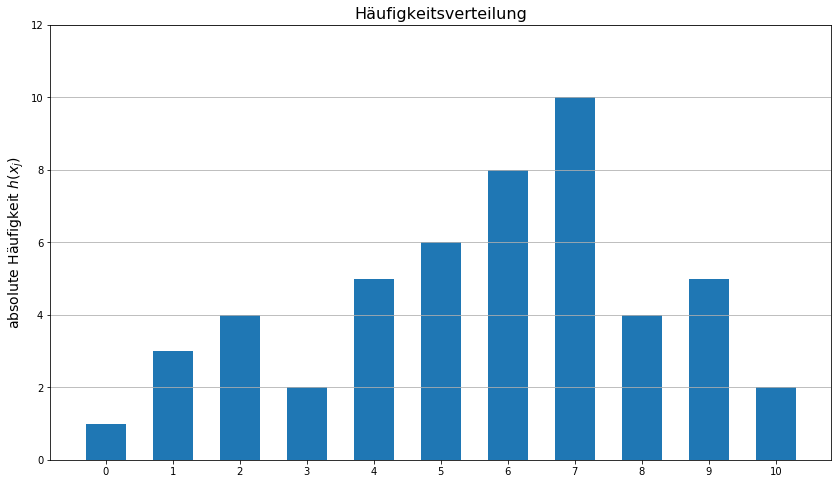

In [40]:
plt.figure(figsize=(14, 8))
plt.bar(x=x_values, height=y_values, width=0.6)
plt.title('Häufigkeitsverteilung', size=16)
plt.ylabel('absolute Häufigkeit $h(x_j)$', size=14)
plt.xticks(x_values)
plt.grid(True, axis='y')
plt.ylim((0, 12))
plt.show()